### First, let’s load all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataSet

In [2]:
df = pd.read_csv("airbnb_listings.csv", encoding="ISO-8859-1")
df.head()

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,Michael,New York,NY,10022-4175,United States,40.756852,-73.964754,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$160.00,322,62,86.0,7.0,10.0,9.0
1,2631556,Denise,New York,NY,NaN,United States,40.830599,-73.941014,Apartment,Entire home/apt,...,3.0,Real Bed,NaN,$105.00,348,22,85.0,8.0,7.0,8.0
2,4601412,Miao,Brooklyn,NY,11221,United States,40.692189,-73.924120,Apartment,Private room,...,2.0,Real Bed,NaN,$58.00,227,35,98.0,10.0,9.0,10.0
3,198425,Sara,New York,NY,10011,United States,40.734751,-74.002592,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$185.00,274,26,96.0,9.0,10.0,9.0
4,22590025,Charles,New York,NY,10011,United States,40.745282,-73.997836,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$195.00,365,1,100.0,10.0,10.0,10.0


## target feature
 Removing the dollar sign ('$') and commas (',') from the 'price' column using regex
 After that, we convert the column to a float type to represent the price as numbers

In [3]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

## 1. Define problem statement and perform Exploratory Data Analysis (20 points)

### a. Observations on shape of data and data types of all attributes

In [4]:
print(f"shape of the data \n{df.shape}")

shape of the data 
(27392, 23)


In [5]:
print(f"Data types of all attributes\n\n{df.dtypes}") 

Data types of all attributes

host_id                        int64
host_name                     object
city                          object
state                         object
zipcode                       object
country                       object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
square_feet                  float64
price                        float64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
review_scores_cleanliness    float64
review_scores_location       float64
review_scores_value          float64
dtype: object


### b. Check for missing value

In [6]:
print(f" missing values\n{df.isnull().sum()}")

 missing values
host_id                          0
host_name                        0
city                             0
state                            2
zipcode                        162
country                          1
latitude                         0
longitude                        0
property_type                    6
room_type                        0
accommodates                     0
bathrooms                      463
bedrooms                       140
beds                            98
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64


This dataset contains a lot of missing values.

### c. Display the statistical summary

In [7]:
df.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,2.739200e+04,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,1006.000000,27392.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,8.518927e+06,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,720.210736,171.256900,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,7.510027e+06,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,652.795558,224.690732,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,2.830000e+02,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,2.104498e+06,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,371.250000,85.000000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,6.119374e+06,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,650.000000,130.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,1.392422e+07,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,913.250000,199.000000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,2.546867e+07,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,12000.000000,8000.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


## d. Univariate Analysis and Bivariate Analysis of all the attributes
Comments:

In [8]:
numerical_columns = df.select_dtypes(include=["float64" , "int64"])

In [9]:
categorical_columns = df.select_dtypes(include=["object"])
categorical_columns

,host_name,city,state,zipcode,country,property_type,room_type,bed_type
0,Michael,New York,NY,10022-4175,United States,Apartment,Entire home/apt,Real Bed
1,Denise,New York,NY,NaN,United States,Apartment,Entire home/apt,Real Bed
2,Miao,Brooklyn,NY,11221,United States,Apartment,Private room,Real Bed
3,Sara,New York,NY,10011,United States,Apartment,Entire home/apt,Real Bed
4,Charles,New York,NY,10011,United States,Apartment,Entire home/apt,Real Bed
...,...,...,...,...,...,...,...,...
27387,Js,New York,NY,10016,United States,Apartment,Entire home/apt,Real Bed
27388,Maja & Pierre,New York,NY,10019,United States,Apartment,Private room,Real Bed
27389,Alissa,Staten Island,NY,10301,United States,House,Entire home/apt,Real Bed
27390,Alex,Brooklyn,NY,11213,United States,Apartment,Entire home/apt,Real Bed


### a. On range of attributes

In [10]:
range_df = pd.DataFrame({
    "Min": numerical_columns.min(),
    "Max": numerical_columns.max(),
    "Range": numerical_columns.max() - numerical_columns.min()
})

print(range_df)

                                  Min           Max         Range
host_id                    283.000000  2.546867e+07  2.546839e+07
latitude                    40.509611  4.090770e+01  3.980922e-01
longitude                  -74.239539 -7.372671e+01  5.128286e-01
accommodates                 1.000000  1.600000e+01  1.500000e+01
bathrooms                    0.000000  8.000000e+00  8.000000e+00
bedrooms                     0.000000  1.000000e+01  1.000000e+01
beds                         1.000000  1.600000e+01  1.500000e+01
square_feet                  0.000000  1.200000e+04  1.200000e+04
price                       10.000000  8.000000e+03  7.990000e+03
availability_365             0.000000  3.650000e+02  3.650000e+02
number_of_reviews            0.000000  2.210000e+02  2.210000e+02
review_scores_rating        20.000000  1.000000e+02  8.000000e+01
review_scores_cleanliness    2.000000  1.000000e+01  8.000000e+00
review_scores_location       2.000000  1.000000e+01  8.000000e+00
review_sco

First, I separated all numerical columns into a variable named numerical_columns.
1. find the minimum value for each numerical column.
2. find the maximum value for each numerical column.
3. calculate the range for each numerical column.
4. store the results in a new DataFrame and display them.

### b. Outliers of various attributes

### First, we identify the outliers for numerical columns

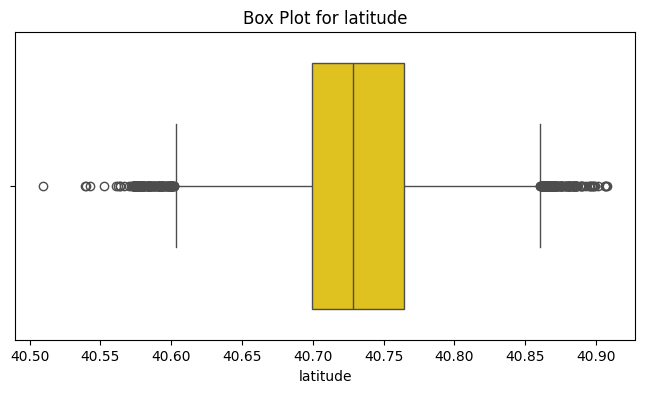

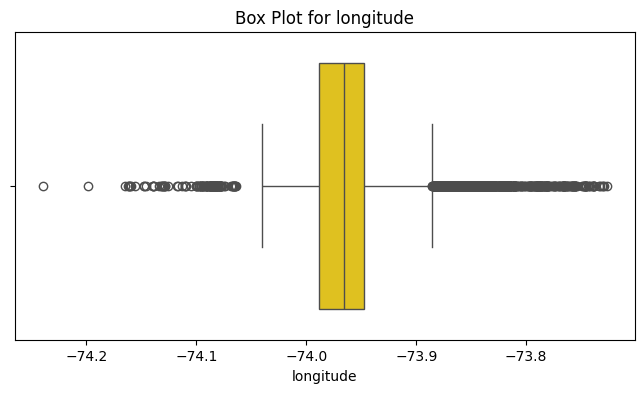

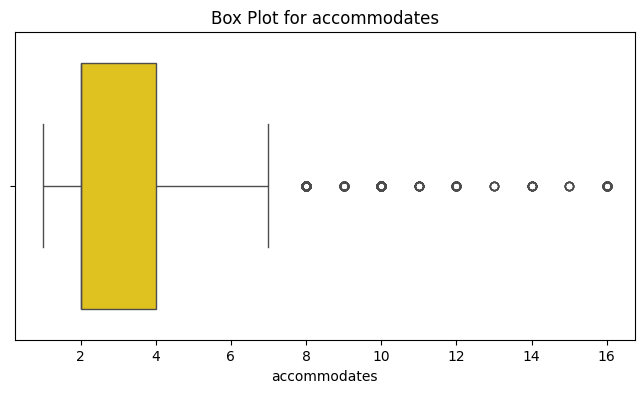

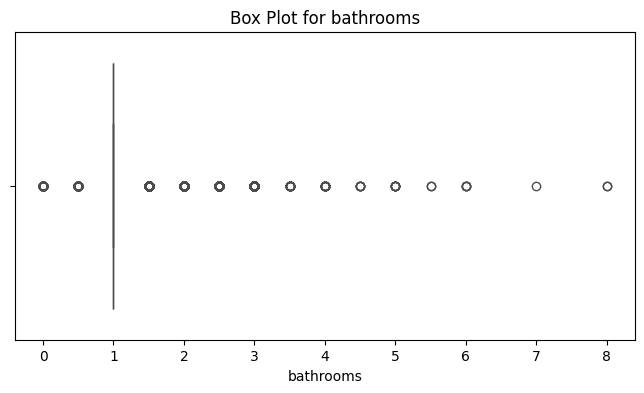

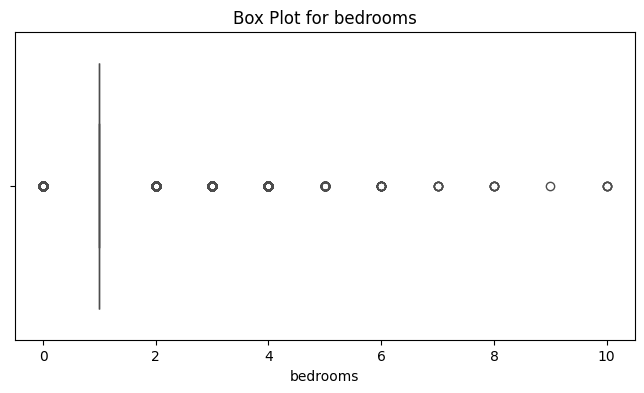

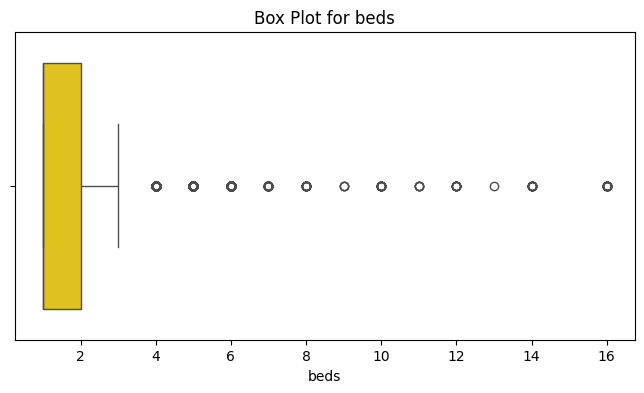

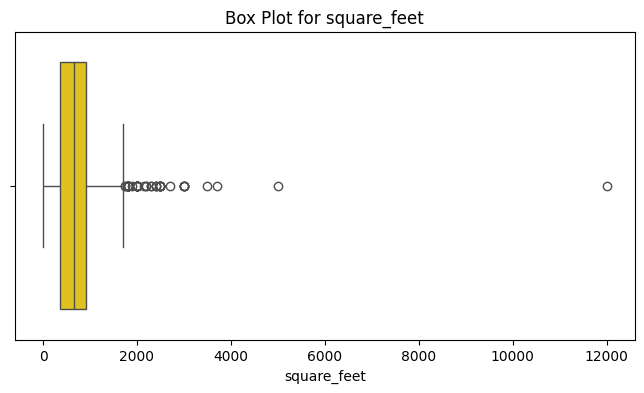

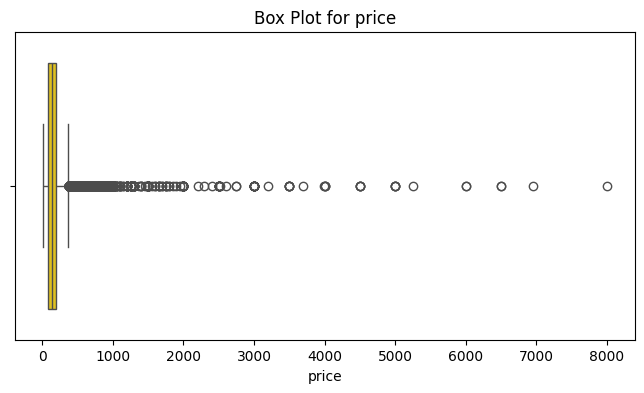

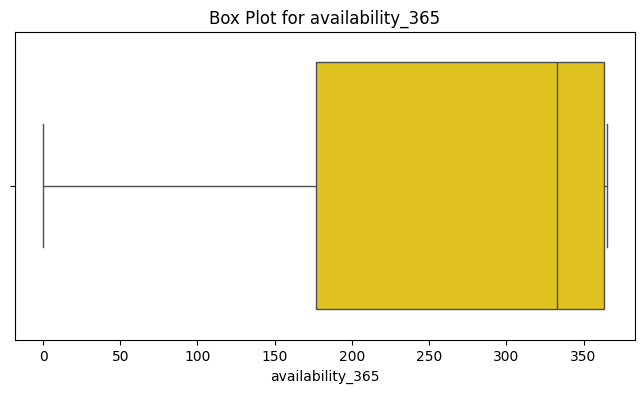

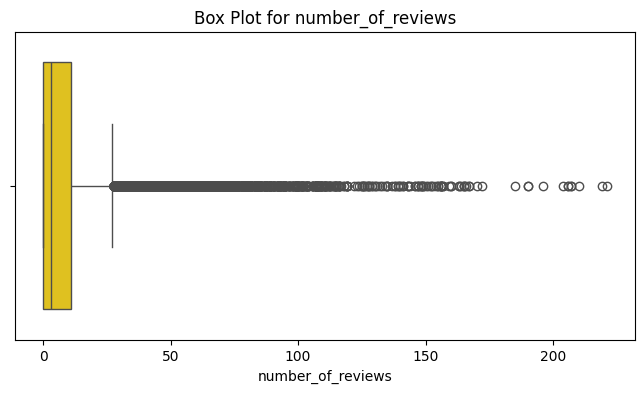

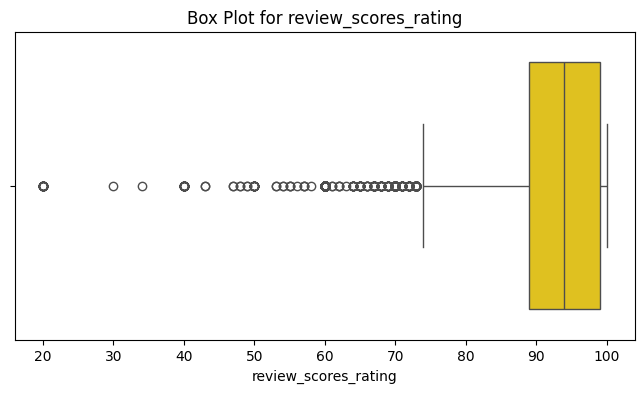

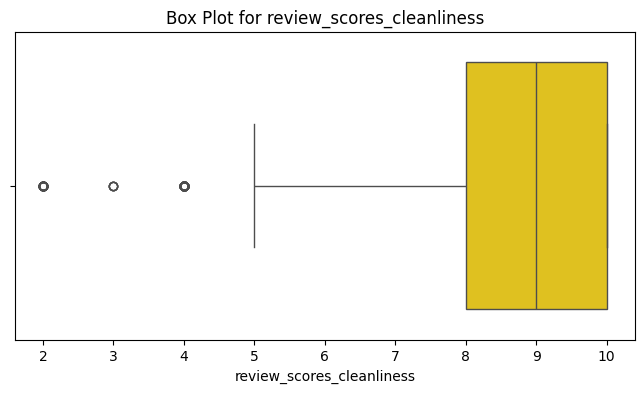

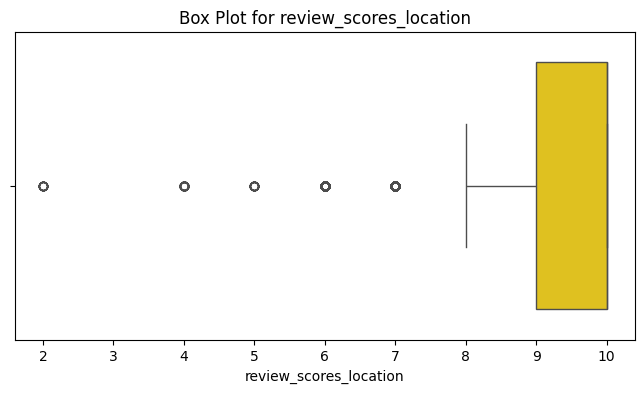

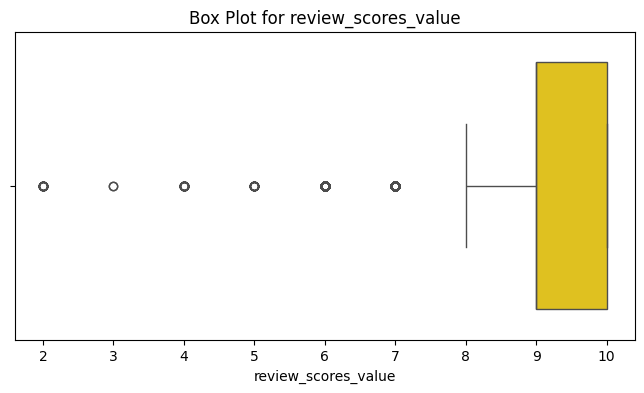

In [11]:
for colum in numerical_columns:
    if "host_id" == colum:
        continue
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[colum],color="#FFD700")
    plt.title(f"Box Plot for {colum}")
    plt.show()

### c. On the distribution of the variables

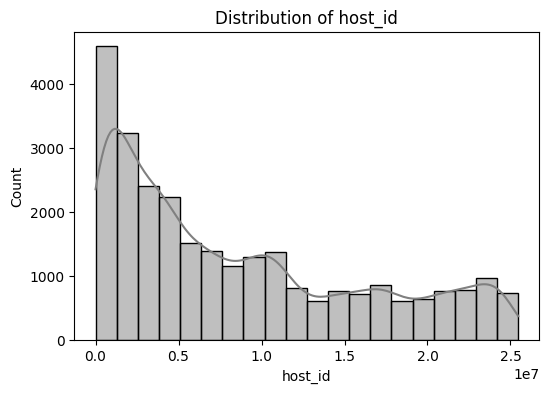

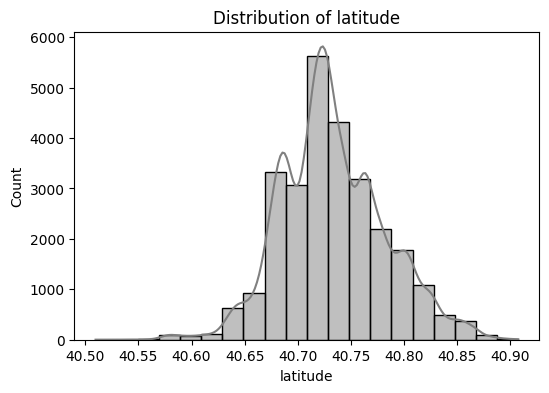

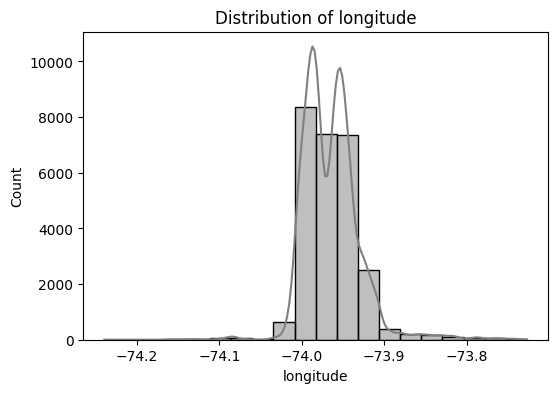

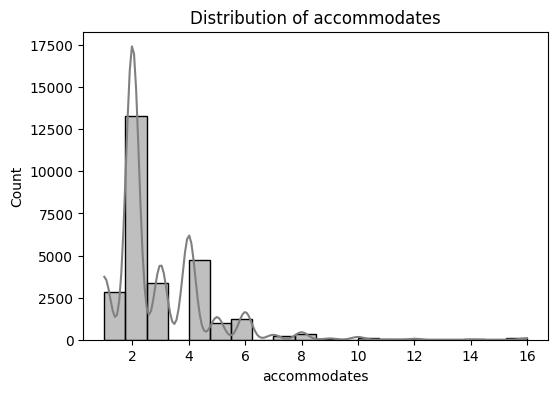

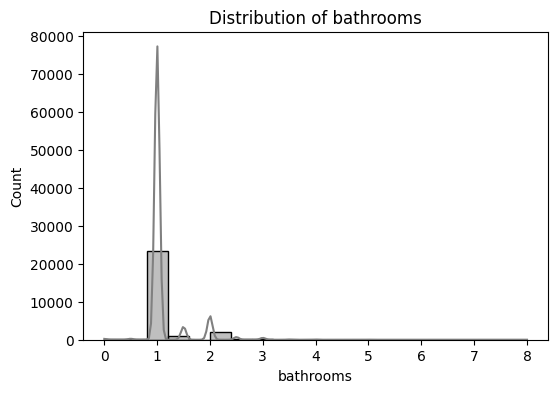

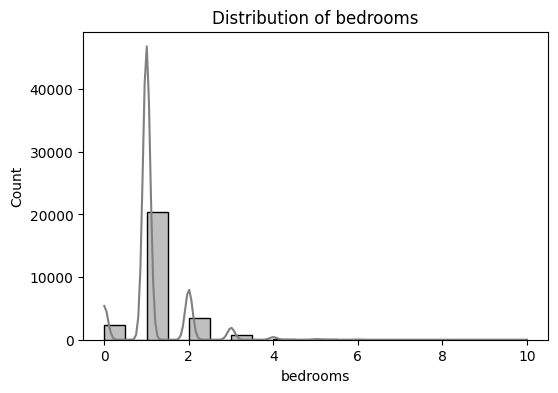

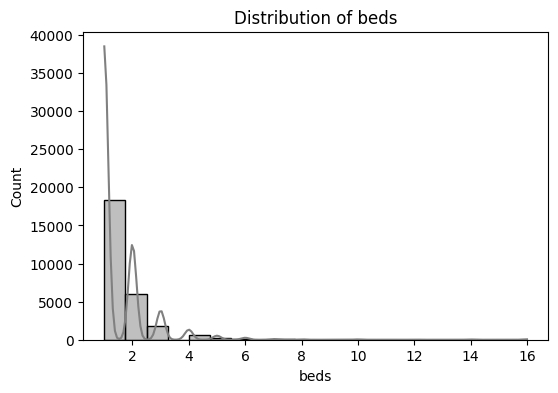

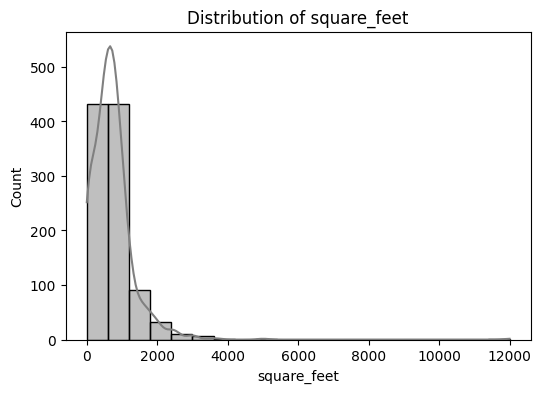

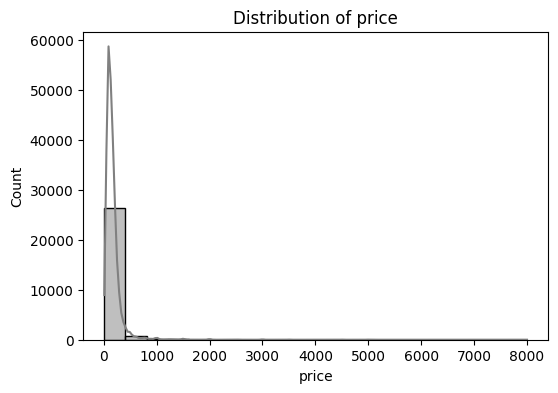

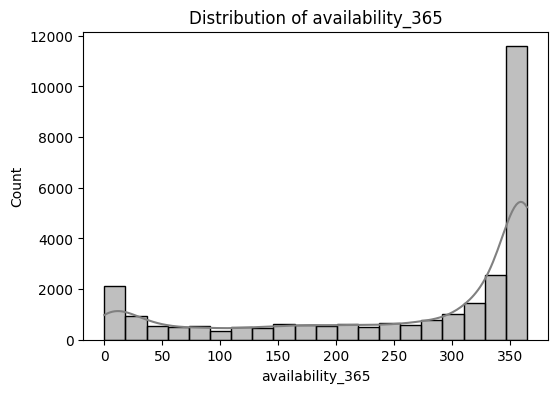

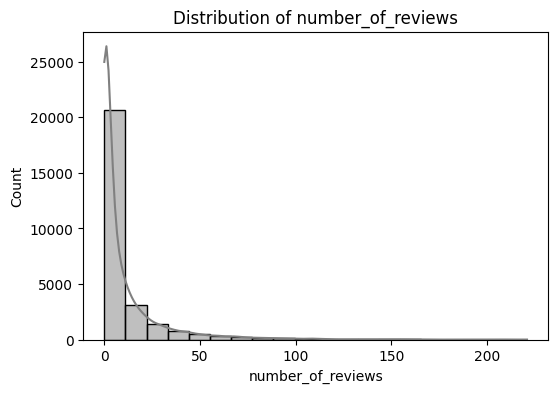

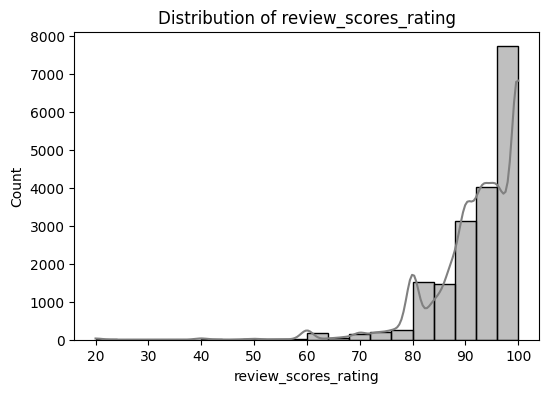

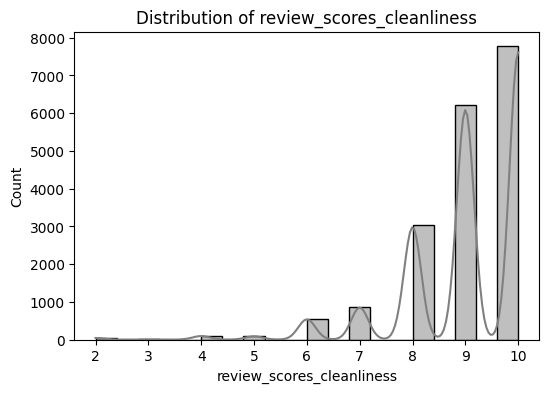

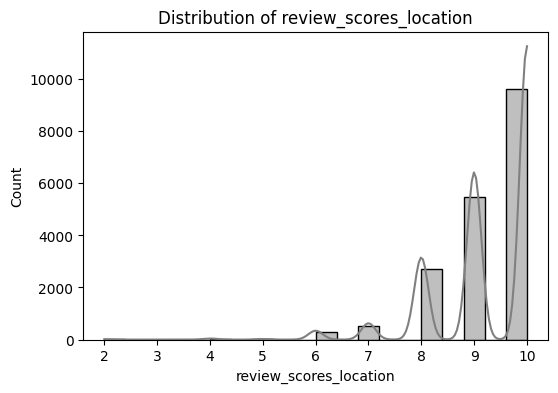

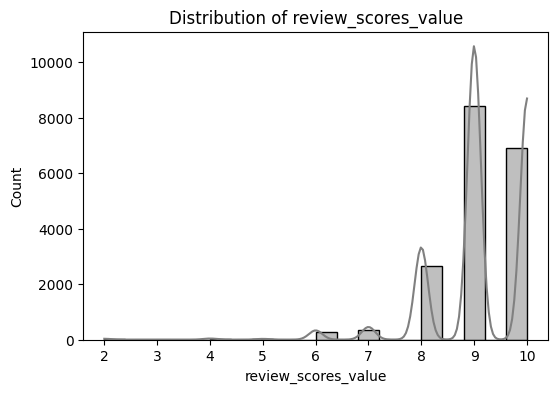

In [12]:
for i in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i],bins=20,kde=True,color='grey')
    plt.title(f'Distribution of {i}')
    plt.show()

### After that, we identify the distribution for categorical columns

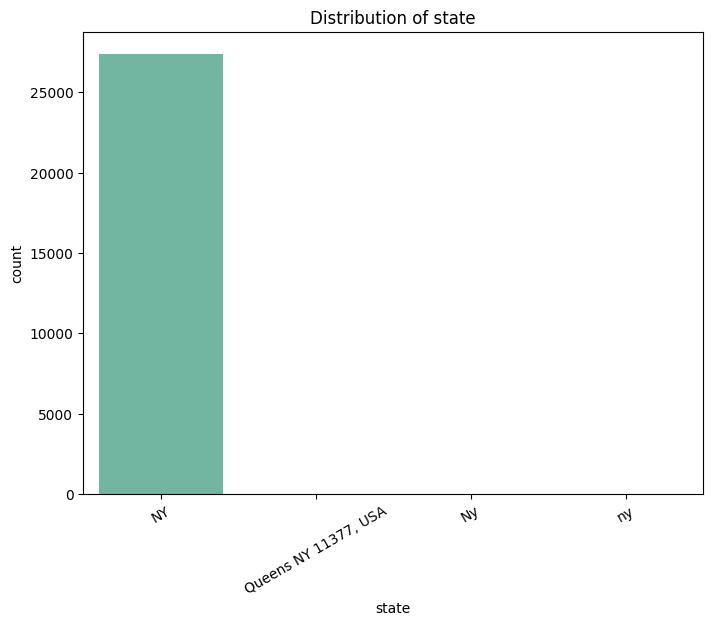

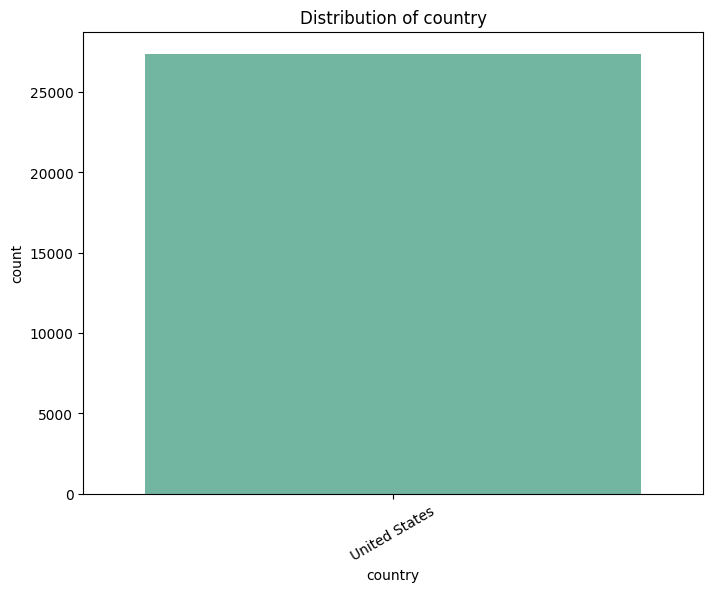

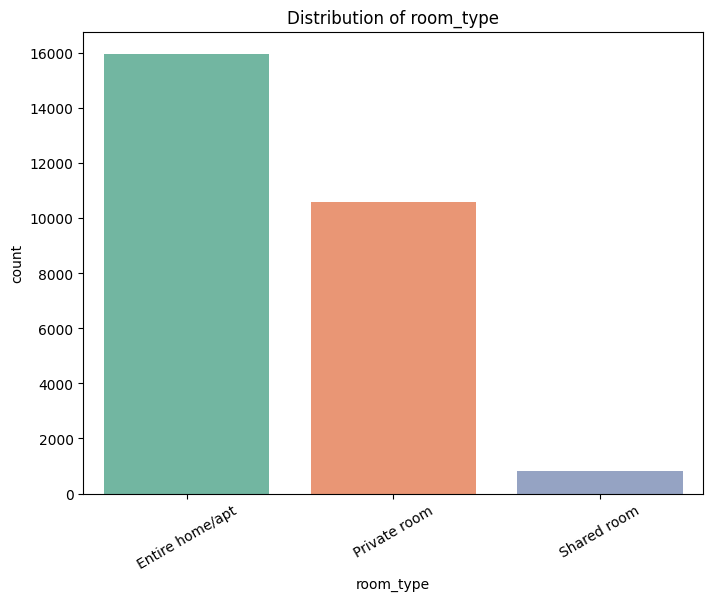

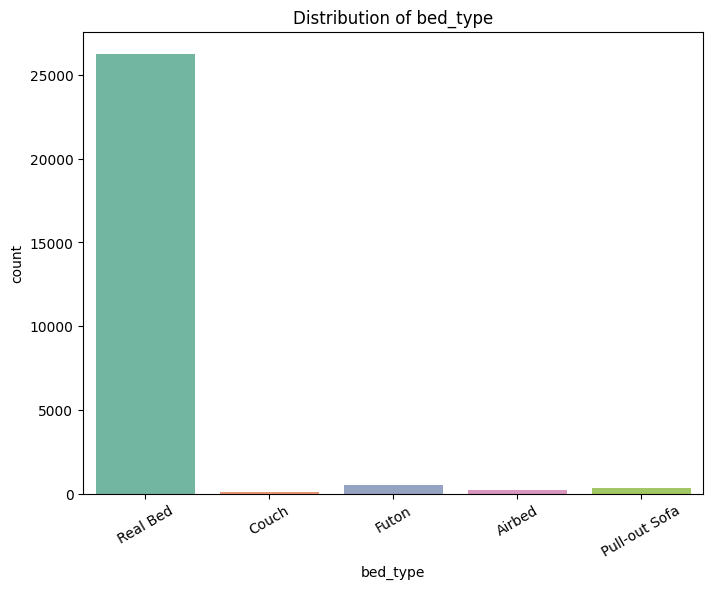

In [13]:
for col in categorical_columns:
    if df[col].nunique()<=15:
        plt.figure(figsize=(8, 6))  
        sns.countplot(x=df[col], palette="Set2")
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=30)  
        plt.show()

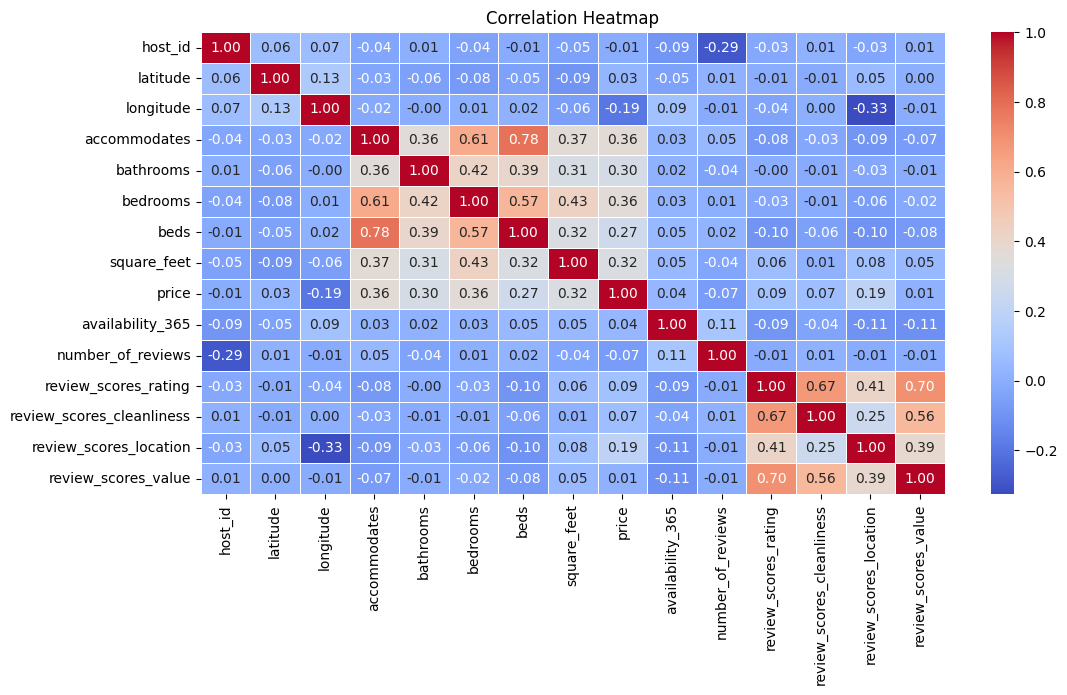

In [14]:
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### After that , I Performed Bivariate Analysis

### Bivariate analysis between categorical variables

In [15]:
df['price_category'] = df['price'].apply(lambda x: 'High' if x > 100 else 'Low')


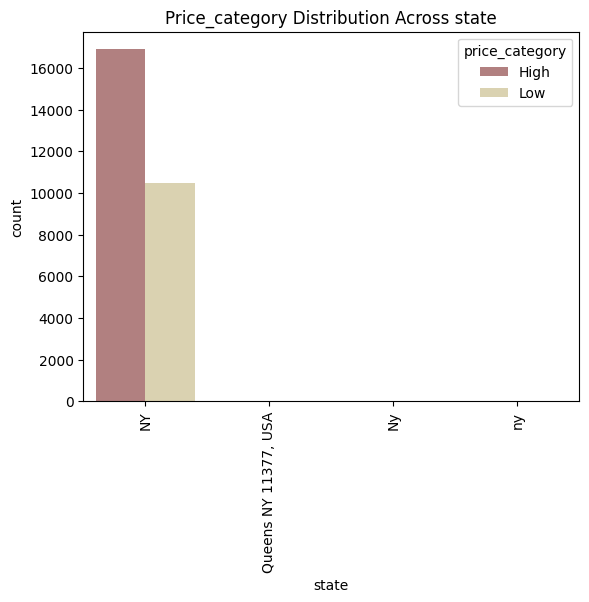

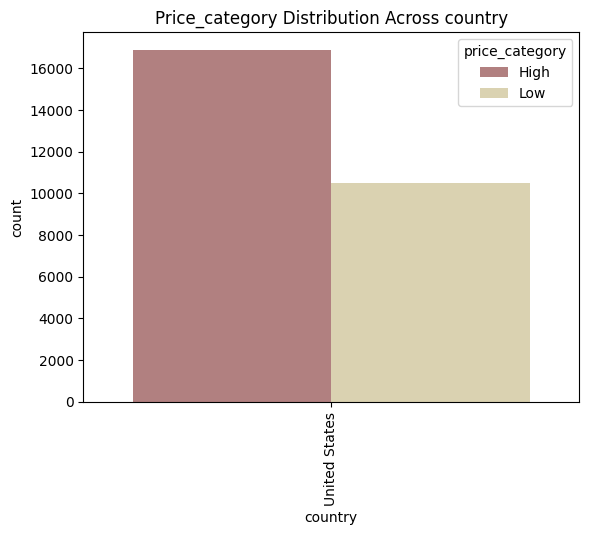

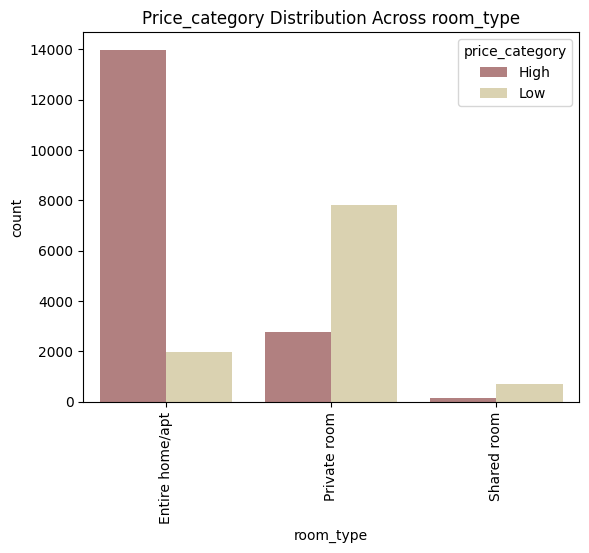

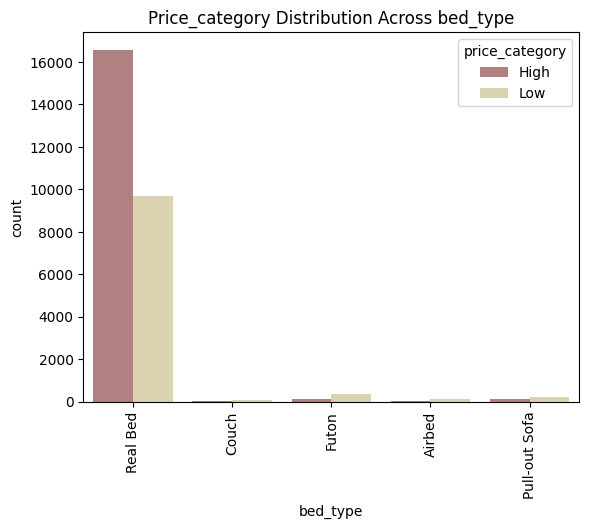

In [16]:
for i in categorical_columns:
    if df[i].nunique()<=15:
       sns.countplot(x=df[i],hue=df['price_category'],palette="pink")
       plt.title(f'Price_category Distribution Across {i}')
       plt.xticks(rotation=90)
       plt.show()

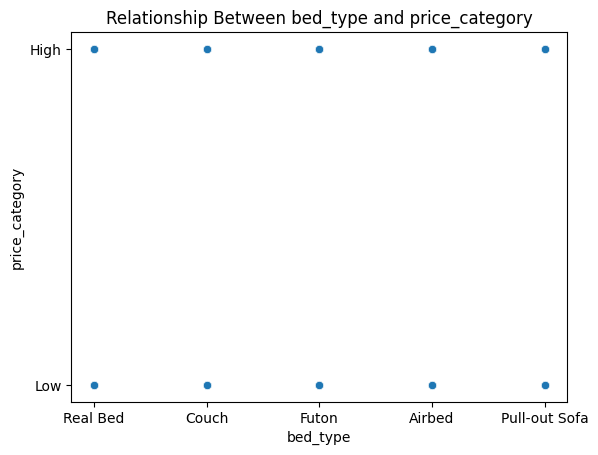

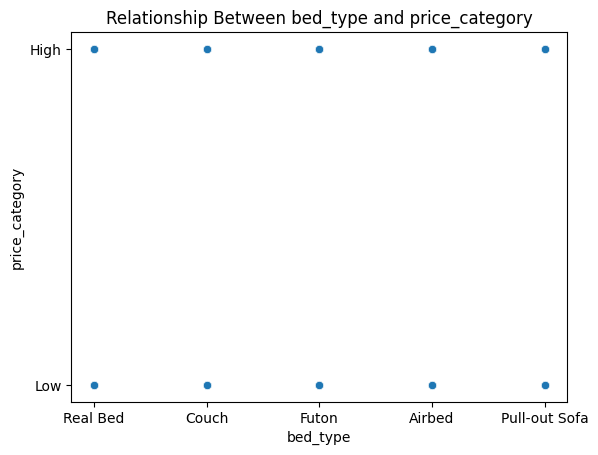

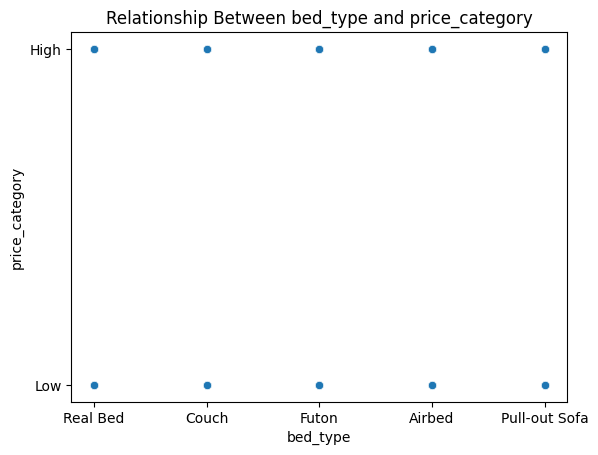

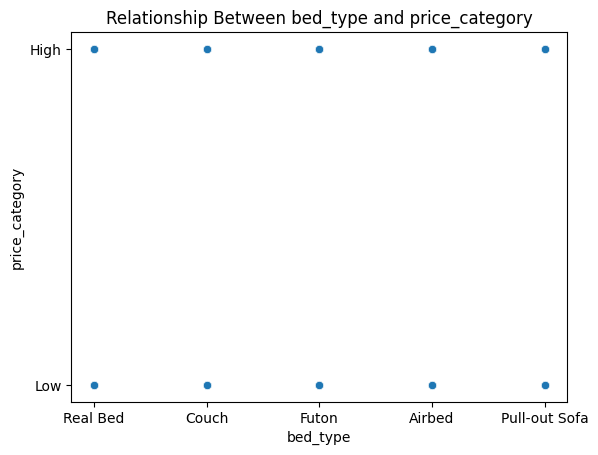

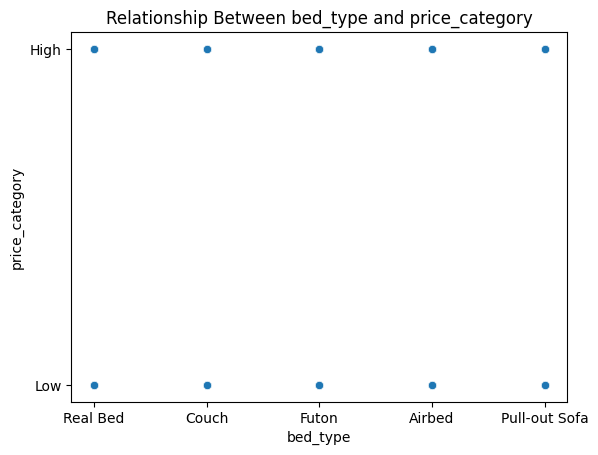

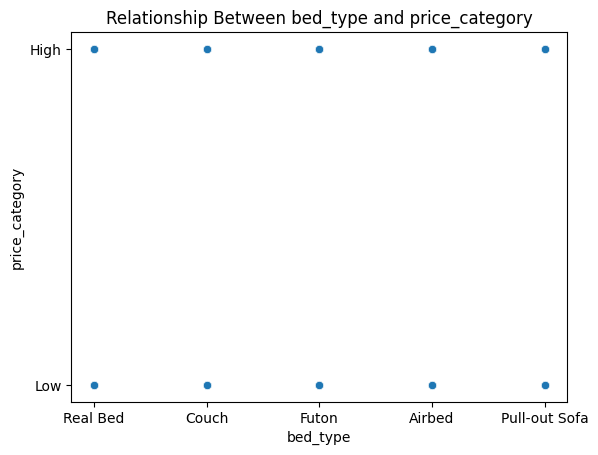

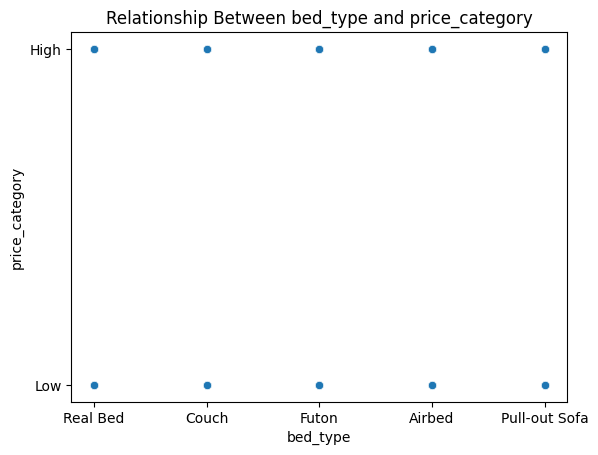

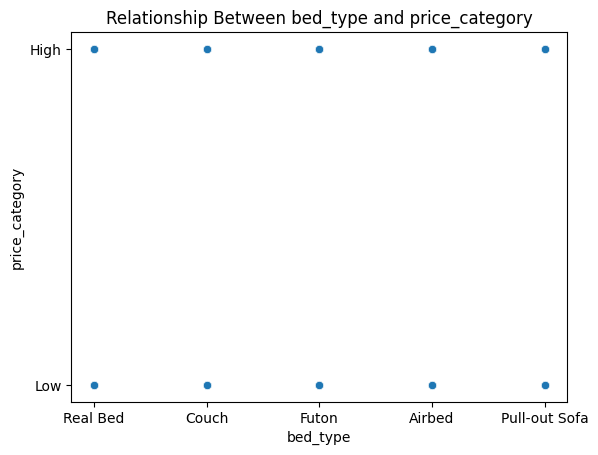

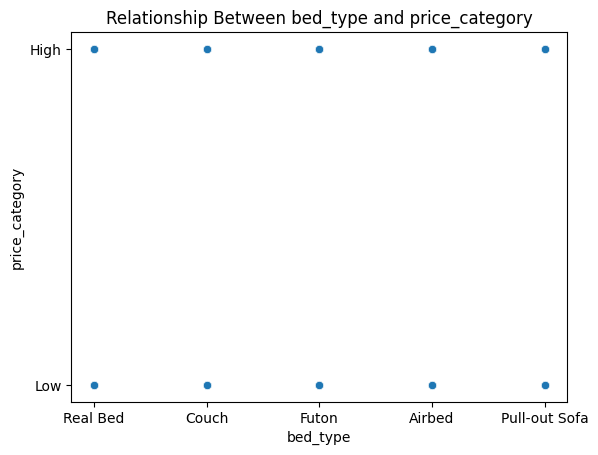

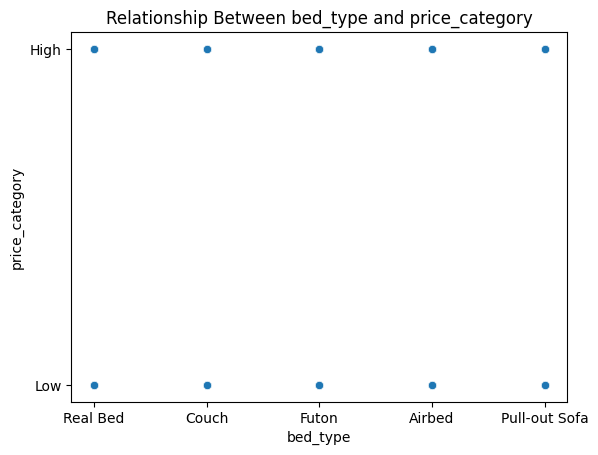

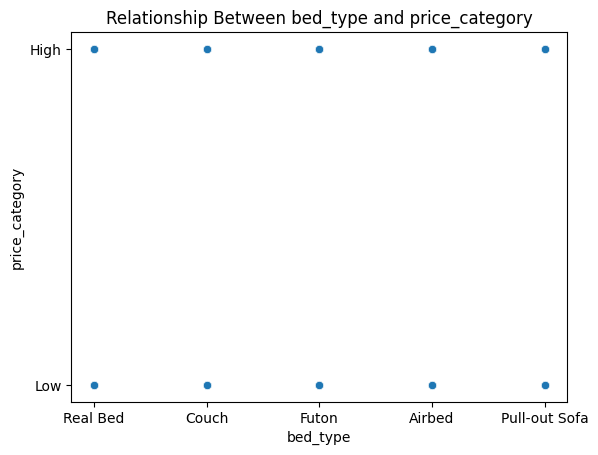

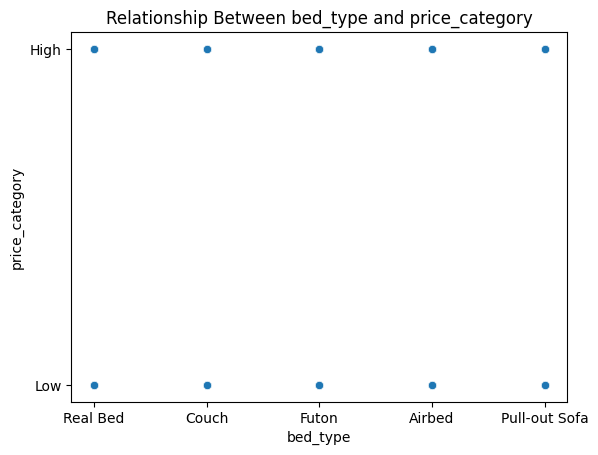

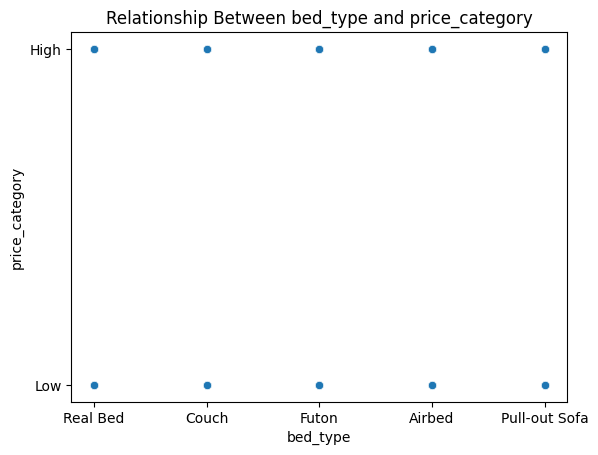

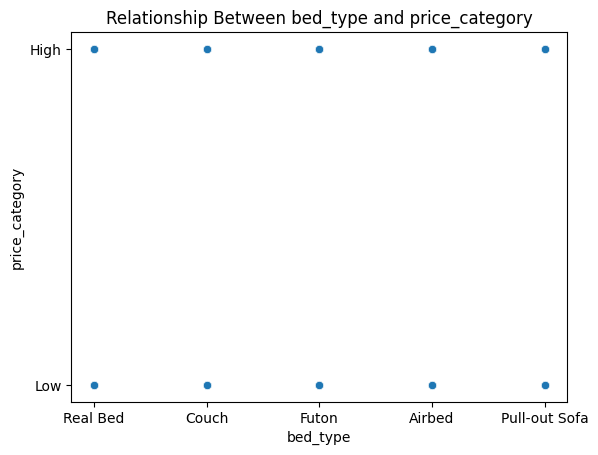

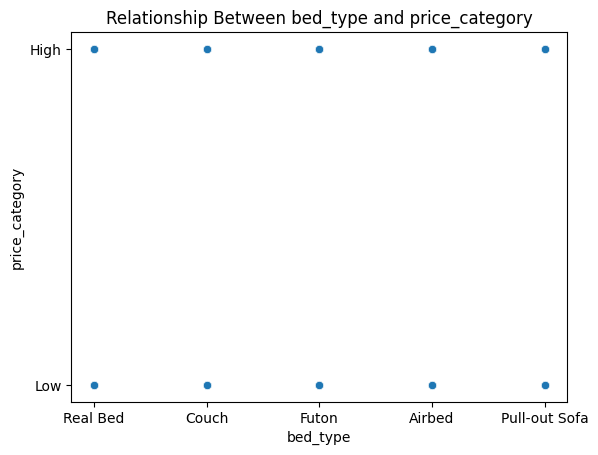

In [17]:
for col in numerical_columns:
    sns.scatterplot(x=i, y='price_category', data=df)
    plt.title(f'Relationship Between {i} and price_category')
    plt.show()

### 2. Data Preprocessing 


###  a. Duplicate value check

In [18]:
df.duplicated().sum()

0

There are no duplicate values in this dataset

### b. Missing value treatment

In [19]:
mod = df['zipcode'].mode()
df['zipcode'].fillna(mod[0], inplace=True)

In [20]:
mod1 = df['state'].mode()
df['state'].fillna(mod1[0], inplace=True)

In [21]:
mod2 = df['country'].mode()
df['country'].fillna(mod2[0], inplace=True)

In [22]:
mod3 = df['property_type'].mode()
df['property_type'].fillna(mod3[0], inplace=True)

In [23]:
med = df['bathrooms'].median()
df['bathrooms'].fillna(med , inplace=True)

In [24]:
med1 = df['bedrooms'].median()
df['bedrooms'].fillna(med1 , inplace=True)

In [25]:
med2 = df['beds'].median()
df['beds'].fillna(med2 , inplace=True)

In [26]:
med3 = df['review_scores_rating'].median()
df['review_scores_rating'].fillna(med3 , inplace=True)

In [27]:
med4 = df['review_scores_cleanliness'].median()
df['review_scores_cleanliness'].fillna(med4 , inplace=True)

In [28]:
med5 = df['review_scores_location'].median()
df['review_scores_location'].fillna(med5 , inplace=True)

In [29]:
med6 = df['review_scores_value'].median()
df['review_scores_value'].fillna(med6 , inplace=True)

In [30]:
df.isnull().sum()

host_id                          0
host_name                        0
city                             0
state                            0
zipcode                          0
country                          0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_cleanliness        0
review_scores_location           0
review_scores_value              0
price_category                   0
dtype: int64

### d. Feature Engineering

In [31]:
df_new = df.drop(['host_id', 'host_name', 'zipcode', 'square_feet','price_category'],axis=1)

In [32]:
df_new.shape

(27392, 19)

In [33]:
df_new['price_per_bedroom'] = df['price'] / df['bedrooms']

In [34]:
df_new['average_review_score'] = df[['review_scores_cleanliness', 'review_scores_location', 'review_scores_value']].mean(axis=1)

In [35]:
df_new['is_entire_home'] = df['room_type'].apply(lambda x: 1 if x == 'Entire home/apt' else 0)

In [36]:
df_new.head(2)

,city,state,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_bedroom,average_review_score,is_entire_home
0,New York,NY,United States,40.756852,-73.964754,Apartment,Entire home/apt,2,1.0,1.0,...,160.0,322,62,86.0,7.0,10.0,9.0,160.0,8.666667,1
1,New York,NY,United States,40.830599,-73.941014,Apartment,Entire home/apt,10,1.0,3.0,...,105.0,348,22,85.0,8.0,7.0,8.0,35.0,7.666667,1
